In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:42:40 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'XMR'

In [5]:
def get_block_reward(current_supply):
    # https://www.reddit.com/r/Monero/comments/512kwh/useful_for_learning_about_monero_coin_emission/
    A = current_supply * 1e12
    M = 2**63
    block_reward = int((M-A) / (2**19)) / 1e12
    block_reward = max(0.6, block_reward)
    return block_reward

def datetime_xmr_supply_curve(num_days):
    supply = [
        # Total supply,
    ]
    start_date = datetime.date(2014, 4, 18)
    y = 0
    for day in range(num_days):
        if day == 0:
            y += 25332.75  # Set the first value manually
                           # https://docs.google.com/spreadsheets/d/1qXi7zUSIh7F6UuSuhOryyFbHEy_LJuym3I3neAga_2s
            supply.append([y])
            continue
        block_reward = get_block_reward(y)
        y += (block_reward * (30 * 24)) # add daily inflation
        supply.append([y])

    df = pd.DataFrame(
        supply, columns=['total_supply']
    )
    df['total_supply_pct'] = (
        df['total_supply'] / df['total_supply'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq='D',
        periods=len(df)
    )
    return df

,total_supply,total_supply_pct,date
0,25332.750000,0.259358,2014-04-18
1,37964.334714,0.388681,2014-04-19
2,50578.572586,0.517826,2014-04-20
3,63175.487439,0.646794,2014-04-21
4,75755.103062,0.775584,2014-04-22


,total_supply,total_supply_pct,date
4440,9.765759e+06,99.982309,2026-06-14
4441,9.766191e+06,99.986731,2026-06-15
4442,9.766623e+06,99.991154,2026-06-16
4443,9.767055e+06,99.995577,2026-06-17
4444,9.767487e+06,100.000000,2026-06-18


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

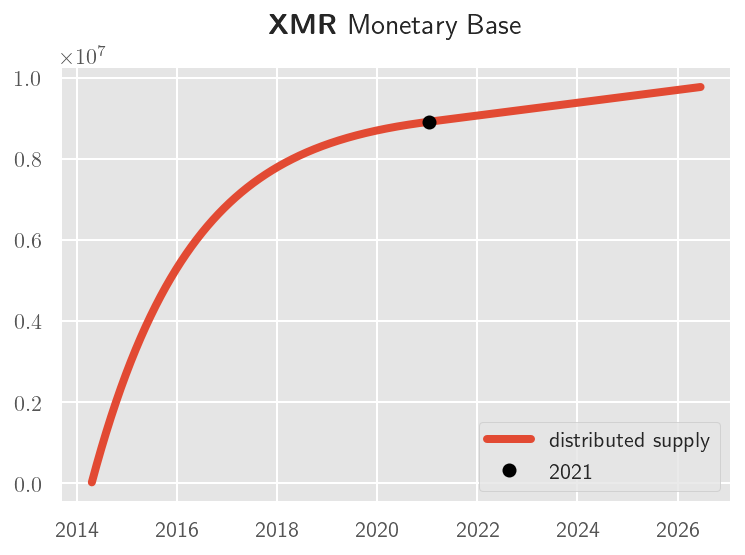

In [6]:
supply = datetime_xmr_supply_curve(num_days=4445)
display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'XMR',
    fmt='-',
    plot_pct=False,
    out_name='XMR_short',
);

,total_supply,total_supply_pct,date
0,25332.750000,0.093653,2014-04-18
1,37964.334714,0.140351,2014-04-19
2,50578.572586,0.186984,2014-04-20
3,63175.487439,0.233554,2014-04-21
4,75755.103062,0.280059,2014-04-22


,total_supply,total_supply_pct,date
44445,2.704792e+07,99.993612,2135-12-25
44446,2.704835e+07,99.995209,2135-12-26
44447,2.704878e+07,99.996806,2135-12-27
44448,2.704921e+07,99.998403,2135-12-28
44449,2.704965e+07,100.000000,2135-12-29


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

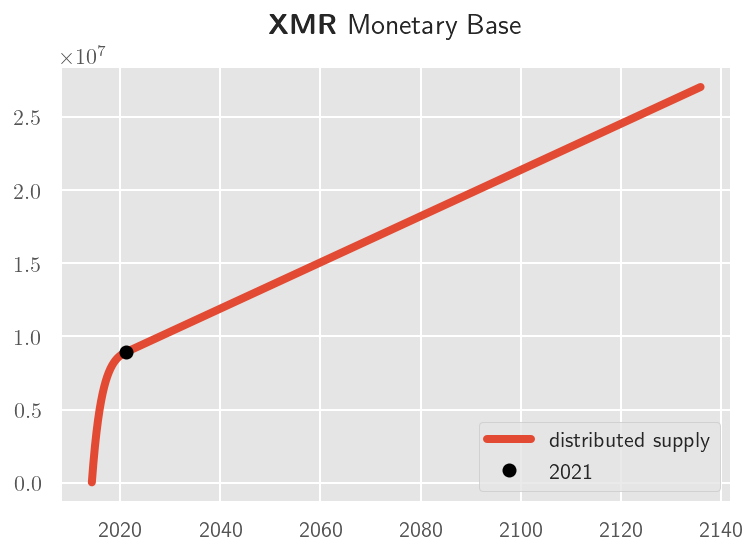

In [7]:
supply = datetime_xmr_supply_curve(num_days=44450)
display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'XMR',
    fmt='-',
    plot_pct=False,
    out_name='XMR_long',
);

<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

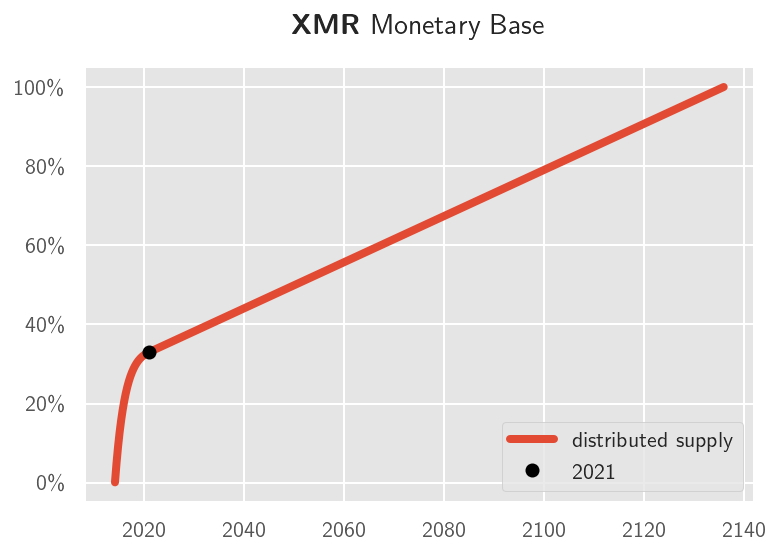

In [8]:
cmb.plot_supply_curve(
    supply,
    'XMR',
    fmt='-',
    out_name='XMR_long_pct',
);

## Standardize Time Series

In [9]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 6351 lines to file ../output-data/XMR_weekly.csv


,coin,total_supply,total_supply_pct,date
0,XMR,25332.750000,0.093653,2014-04-01
1,XMR,63175.487439,0.233554,2014-04-01
2,XMR,150870.841072,0.557755,2014-04-01
3,XMR,237726.641207,0.878853,2014-05-01
4,XMR,323750.925330,1.196877,2014-05-01


,coin,total_supply,total_supply_pct,date
6346,XMR,2.703625e+07,99.950491,2135-11-01
6347,XMR,2.703928e+07,99.961670,2135-12-01
6348,XMR,2.704230e+07,99.972850,2135-12-01
6349,XMR,2.704533e+07,99.984029,2135-12-01
6350,XMR,2.704835e+07,99.995209,2135-12-01


In [10]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1461 lines to file ../output-data/XMR_monthly.csv


,coin,total_supply,total_supply_pct,date
0,XMR,2.533275e+04,0.093653,2014-04-01
1,XMR,1.881971e+05,0.695747,2014-05-01
2,XMR,5.650235e+05,2.088839,2014-06-01
3,XMR,9.147235e+05,3.381647,2014-07-01
4,XMR,1.261249e+06,4.662719,2014-08-01


,coin,total_supply,total_supply_pct,date
1456,XMR,2.698485e+07,99.760440,2135-08-01
1457,XMR,2.699824e+07,99.809949,2135-09-01
1458,XMR,2.701120e+07,99.857861,2135-10-01
1459,XMR,2.702459e+07,99.907370,2135-11-01
1460,XMR,2.703755e+07,99.955282,2135-12-01


In [11]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 122 lines to file ../output-data/XMR_yearly.csv


,coin,total_supply,total_supply_pct,date
0,XMR,2.533275e+04,0.093653,2014-04-01
1,XMR,2.771065e+06,10.244367,2015-01-01
2,XMR,5.316090e+06,19.653084,2016-01-01
3,XMR,6.860514e+06,25.362674,2017-01-01
4,XMR,7.792511e+06,28.808181,2018-01-01


,coin,total_supply,total_supply_pct,date
117,XMR,2.626211e+07,97.088553,2131-01-01
118,XMR,2.641979e+07,97.671482,2132-01-01
119,XMR,2.657790e+07,98.256007,2133-01-01
120,XMR,2.673558e+07,98.838935,2134-01-01
121,XMR,2.689326e+07,99.421863,2135-01-01
